# One dimensional Neural Network

In [49]:
from neuralnetwork.datasets import blobs, nregion, circle
from neuralnetwork import Network

Layer: L0, Neurons: 1, Activation: None, Weights: (0, 0), Biases: (0, 0)
Layer: L1, Neurons: 25, Activation: absolute, Weights: (25, 1), Biases: (25, 1)
Layer: L2, Neurons: 25, Activation: relu, Weights: (25, 25), Biases: (25, 1)
Layer: L3, Neurons: 1, Activation: sigmoid, Weights: (1, 25), Biases: (1, 1)


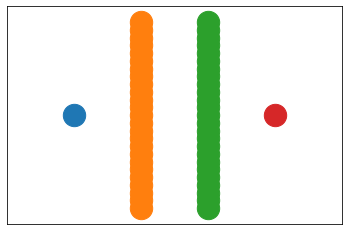

In [50]:
# Example Network
mynetwork = Network(1)
mynetwork.add_layer(25, activation = 'absolute' )
mynetwork.add_layer(25, activation = 'relu')
mynetwork.add_layer(1, activation = 'sigmoid')
mynetwork.summary()

# Simple Prediction

# Load Dataset

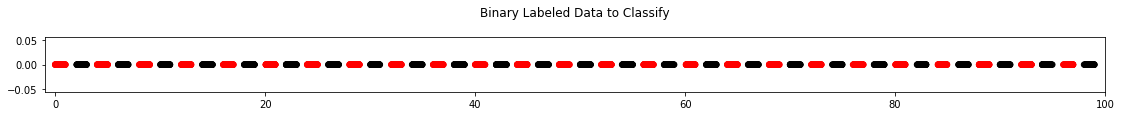

In [51]:
X,Y,C = nregion.load_data(regions = 50)
nregion.graph(X,Y)

In [52]:
len(C)

25

# N region initialization

In [53]:
import numpy as np

In [54]:
# Change the slopes of first layer to 1
mynetwork.layers['L1']['weights'] = np.ones_like(mynetwork.layers['L1']['weights'])
mynetwork.layers['L1']['weights']

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [55]:
# Change the biases to the list of centers
mynetwork.layers['L1']['biases'] = -np.array(C).reshape(mynetwork.layers['L1']['biases'].shape)
mynetwork.layers['L1']['biases']

array([[ -2.5],
       [ -6.5],
       [-10.5],
       [-14.5],
       [-18.5],
       [-22.5],
       [-26.5],
       [-30.5],
       [-34.5],
       [-38.5],
       [-42.5],
       [-46.5],
       [-50.5],
       [-54.5],
       [-58.5],
       [-62.5],
       [-66.5],
       [-70.5],
       [-74.5],
       [-78.5],
       [-82.5],
       [-86.5],
       [-90.5],
       [-94.5],
       [-98.5]])

In [56]:
mynetwork.layers['L2']['weights'].shape[0]

25

In [57]:
mynetwork.layers['L2']['weights'] = -np.identity(mynetwork.layers['L2']['weights'].shape[0], dtype=None)
mynetwork.layers['L2']['weights']

array([[-1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -1., -0., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -1., -0., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0., -1., -0., -0., -0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
      

In [58]:
mynetwork.layers['L2']['biases'] = np.zeros_like(mynetwork.layers['L2']['biases'])+0.5
mynetwork.layers['L2']['biases']

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [59]:
mynetwork.layers['L3']['weights'] = np.ones_like(mynetwork.layers['L3']['weights'])
mynetwork.layers['L3']['weights']

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [60]:
mynetwork.layers['L3']['biases'] = -0.01
mynetwork.layers['L3']['biases']

-0.01

# Graph the decision boundary

In [61]:
def prediction(x):
    return mynetwork.predict(x)-0.5

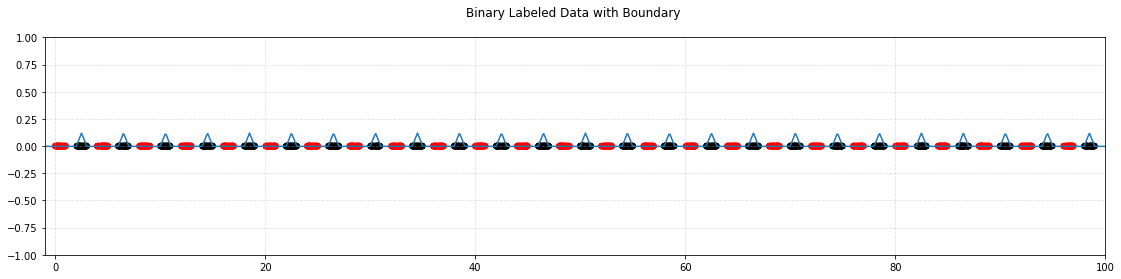

In [62]:
# Graph Decision Boundary
nregion.graph(X, Y, decision = prediction)

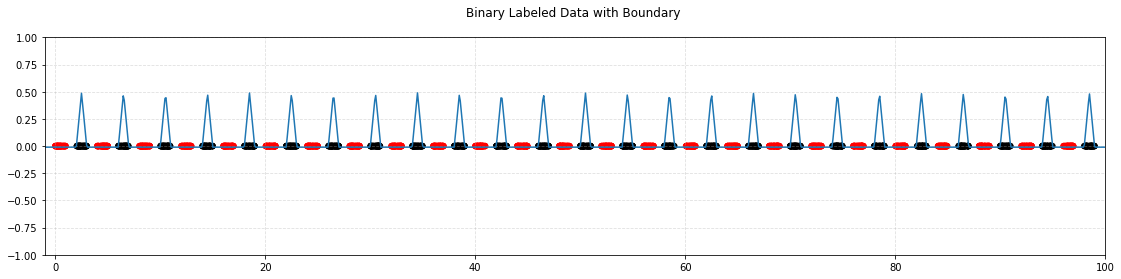

In [63]:
# Graph Decision Boundary
nregion.graph(X, Y, decision = mynetwork.decision)

# Backward pass illusrated

In [64]:
print(f"Loss: {mynetwork.binary_crossentropy_loss(X,Y):.3f}")

Loss: 0.636


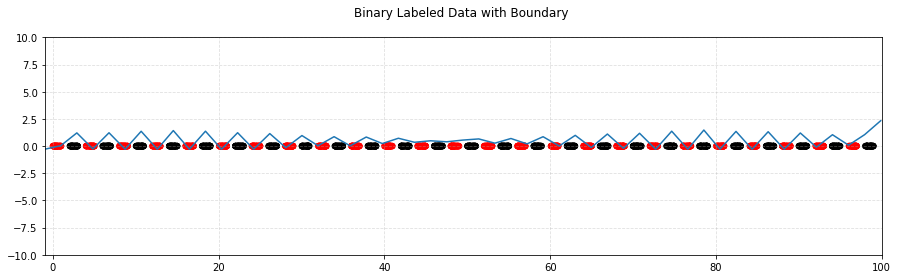

Loss: 0.41877751


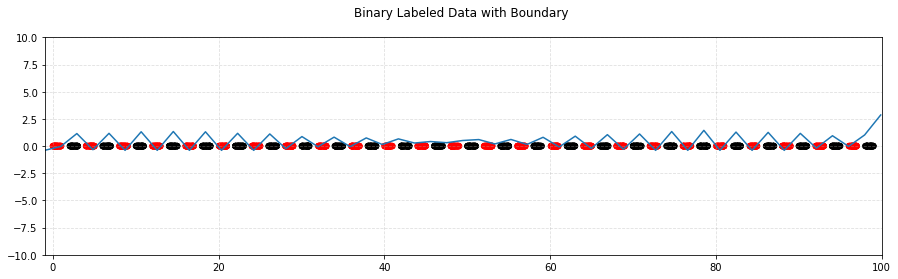

Loss: 0.40607826


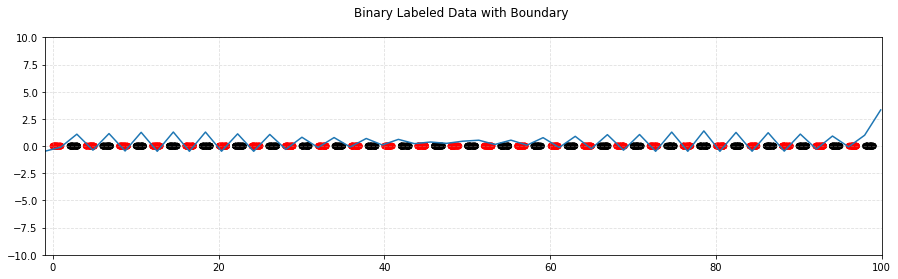

Loss: 0.39586801


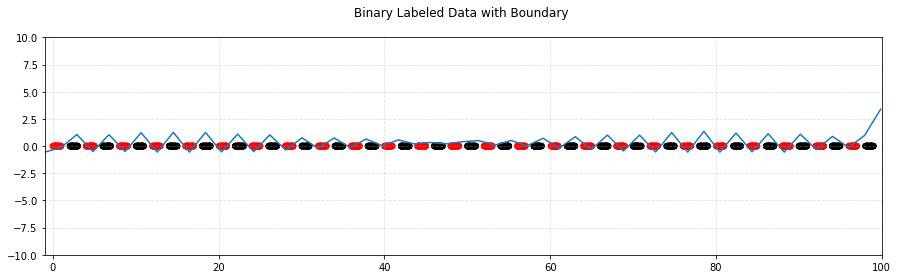

Loss: 0.38743360


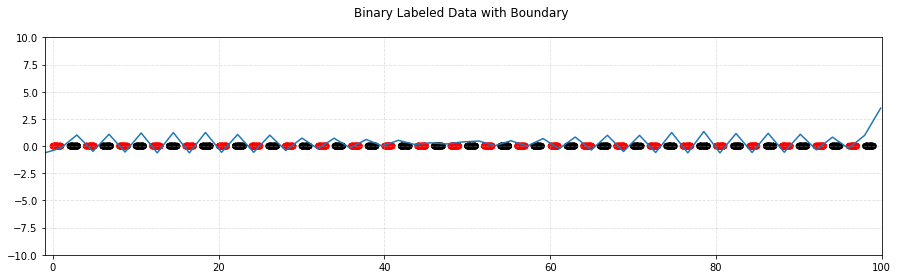

Loss: 0.38020348


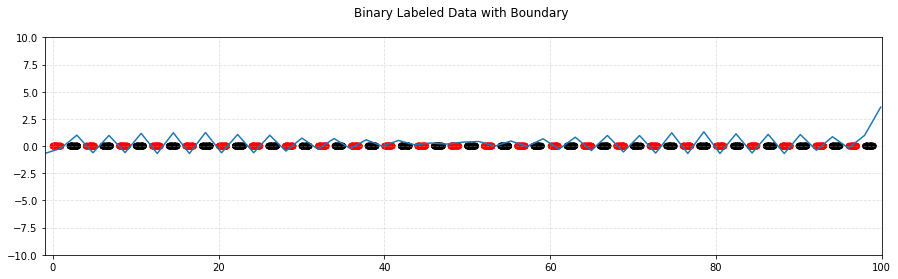

Loss: 0.37378072


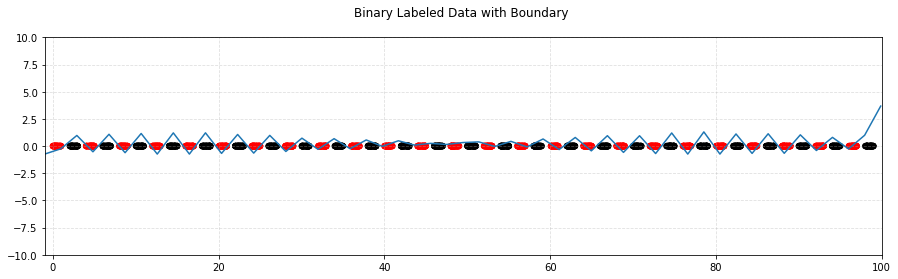

Loss: 0.36799563


KeyboardInterrupt: 

In [66]:
import matplotlib.pyplot as plt
decision = mynetwork.decision
for n in range(100):
    mynetwork.train(X, Y, learning_rate=0.001, num_epochs=1000)
    plt.figure(figsize=(15,4))
    plt.scatter(X[:,0], np.zeros(X[:,0].shape), c=Y, cmap='flag', s = 30)

    plt.grid(alpha=.4,linestyle='--')
    X_line = np.arange(min(X[:,0])-1, max(X[:,0])+1, (max(X[:,0])-1 - min(X[:,0])-1)/50)
    X_line_reshape = X_line.reshape(X_line.shape[0],1)
    Y_line = [decision(X_line_reshape[i])[0][0] for i in range(len(X_line_reshape))]
    plt.plot(X_line, Y_line)
    plt.title('Binary Labeled Data with Boundary \n')
    plt.ylim(-10,10)
    plt.xlim(min(X[:,0])-1, max(X[:,0])+1)
    x = np.array(range(100))
    plt.show()
    plt.close()
    print(f"Loss: {mynetwork.binary_crossentropy_loss(X,Y):.8f}")

